<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Klasifikasi_UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import numpy as np

In [4]:
# Ganti path sesuai lokasi file di Google Drive
file_path = "/content/drive/MyDrive/Dataset/KlasifikasiUTS.csv"
# Membaca file Excel
shutil.copy(file_path, '/content/KlasifikasiUTS.csv')
data = pd.read_csv(file_path,)


In [5]:
# Menampilkan beberapa baris pertama untuk memeriksa data
print("Data Sample: ")
print(data.head())


Data Sample: 
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       

In [7]:

# Pembersihan Data
# 1. Menghapus kolom yang tidak diperlukan (misalnya kolom "Time")
data = data.drop(columns=["Time"])

# 2. Menangani missing values (jika ada)
data = data.fillna(data.mean())  # Mengisi missing values dengan rata-rata kolom

# 3. Menghapus duplikasi
data = data.drop_duplicates()

# 4. Mengonversi tipe data yang tidak sesuai
# Misalnya, pastikan kolom "Amount" dan "Class" adalah tipe data yang benar
data["Amount"] = pd.to_numeric(data["Amount"], errors='coerce')
data["Class"] = data["Class"].astype(int)

# 5. Memeriksa data setelah pembersihan
print("Data Setelah Pembersihan: ")
print(data.head())


Data Setelah Pembersihan: 
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28

<ipython-input-7-b083890c6ac8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Amount"] = pd.to_numeric(data["Amount"], errors='coerce')
<ipython-input-7-b083890c6ac8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Class"] = data["Class"].astype(int)


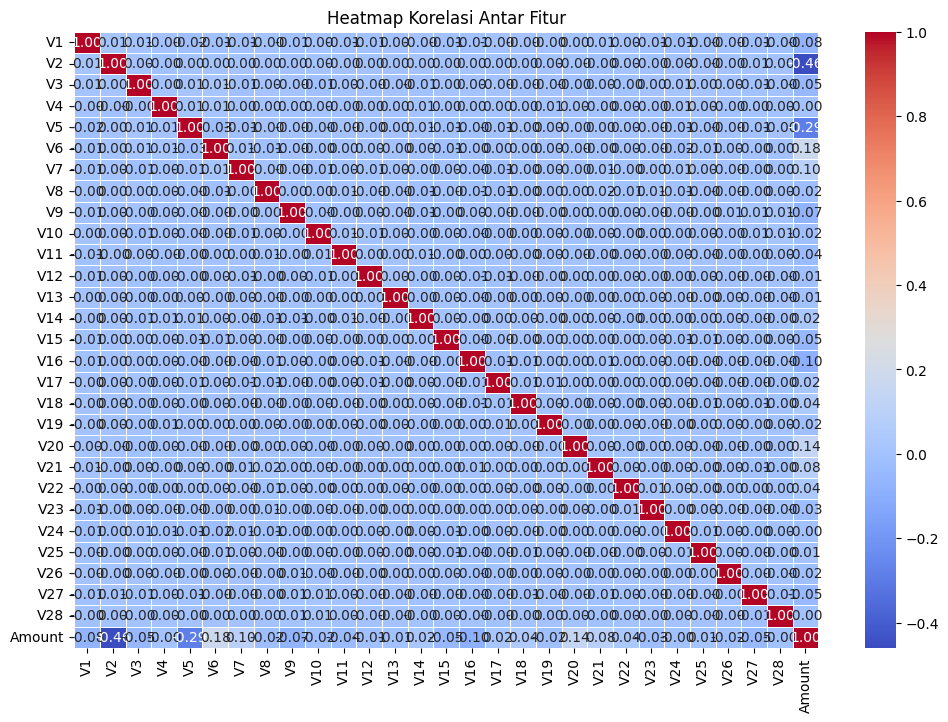

Mutual Information untuk setiap fitur: 
   Feature  Mutual Information
28  Amount            0.000251
0       V1            0.000193
18     V19            0.000162
15     V16            0.000155
6       V7            0.000139
27     V28            0.000131
24     V25            0.000102
11     V12            0.000101
4       V5            0.000065
1       V2            0.000061
21     V22            0.000027
8       V9            0.000023
12     V13            0.000016
10     V11            0.000010
22     V23            0.000007
7       V8            0.000003
3       V4            0.000000
9      V10            0.000000
5       V6            0.000000
2       V3            0.000000
14     V15            0.000000
20     V21            0.000000
19     V20            0.000000
17     V18            0.000000
16     V17            0.000000
13     V14            0.000000
23     V24            0.000000
26     V27            0.000000
25     V26            0.000000
Hasil ANOVA F-test: 
   Featur

In [25]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

# Scaling data
scaler = StandardScaler()
features = data.drop(columns=["Class"])
scaled_features = scaler.fit_transform(features)

# Mengubah dataset menjadi DataFrame setelah scaling
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Menambahkan kembali kolom "Class"
scaled_data['Class'] = data['Class']

from sklearn.impute import SimpleImputer
# Impute NaN values with the mean *before* scaling and feature selection
imputer = SimpleImputer(strategy='mean')
# Apply imputer on the features before scaling
features = imputer.fit_transform(features)

# Now, perform scaling with the imputed features
scaled_features = scaler.fit_transform(features)

# 1. Menghapus Fitur dengan Varians Rendah (Konstan/Kuas-Konstan)
selector = VarianceThreshold(threshold=0.01)  # Hapus fitur dengan varians kurang dari 1%
data_no_constant = selector.fit_transform(scaled_data.drop(columns=["Class"]))

# 2. Menghapus Fitur Duplikat
data_no_duplicates = scaled_data.loc[:, ~scaled_data.columns.duplicated()]

# 3. Korelasi antar Fitur - Menghapus fitur dengan korelasi tinggi (> 0.9)
corr_matrix = scaled_data.drop(columns=["Class"]).corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# Menghapus fitur dengan korelasi lebih dari 0.9
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

data_no_high_corr = scaled_data.drop(columns=high_corr_features)

# 4. Mutual Information antara Fitur dan Target
# Menangani NaN pada kolom "Class" dengan menghapus baris yang mengandung NaN
scaled_data = scaled_data.dropna(subset=["Class"])

# Memisahkan fitur dan target setelah menghapus NaN
X = scaled_data.drop(columns=["Class"])
y = scaled_data["Class"]

# Menghitung Mutual Information antara fitur dan target
mutual_info = mutual_info_classif(X, y)

# Menampilkan hasil Mutual Information
mi_df = pd.DataFrame({"Feature": X.columns, "Mutual Information": mutual_info})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)
print("Mutual Information untuk setiap fitur: ")
print(mi_df)

# 5. ANOVA untuk Seleksi Fitur
f_values, p_values = f_classif(X, y)

anova_df = pd.DataFrame({"Feature": X.columns, "F-Value": f_values, "P-Value": p_values})
anova_df = anova_df.sort_values(by="F-Value", ascending=False)
print("Hasil ANOVA F-test: ")
print(anova_df)

# Fitur yang dipilih berdasarkan hasil dari fitur selection
selected_features = data_no_high_corr.columns
print(f"Fitur yang dipilih setelah Feature Selection: {selected_features}")

In [26]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Asumsi: scaled_data sudah di-scaling dan siap digunakan.

# 1. Transformasi Data (Log Transformasi untuk kolom 'Amount' jika perlu)
# Jika 'Amount' memiliki distribusi miring, kita bisa melakukan log-transformasi untuk membuat distribusinya lebih normal
scaled_data['Amount'] = np.log1p(np.abs(scaled_data['Amount'])) # Handle negative values before log transformation

# Menampilkan data setelah transformasi
print("Data setelah log-transformasi pada kolom 'Amount': ")
print(scaled_data[['Amount']].head())

# 2. Label Encoding (untuk kolom kategorikal dengan urutan)
# Misalnya, kita anggap "Class" adalah fitur kategorikal dengan urutan yang sudah numerik
# Jika "Class" sudah numerik, kita tidak perlu Label Encoding lagi
label_encoder = LabelEncoder()
scaled_data['Class'] = label_encoder.fit_transform(scaled_data['Class'])

# 3. One-Hot Encoding (untuk fitur kategorikal tanpa urutan)
# Misalnya, jika ada fitur kategorikal selain "Class", kita akan mengubahnya menjadi one-hot encoding
# Contoh: Kita anggap ada kolom kategorikal lain yang disebut "Category" yang perlu di-one-hot encoding
# scaled_data = pd.get_dummies(scaled_data, columns=['Category'])

# 4. Scaling dan Normalisasi (Karena sudah di-scaling sebelumnya, kita tidak perlu lagi melakukan scaling)
# Data sudah siap untuk digunakan dalam model machine learning setelah scaling.

# Menampilkan hasil akhir setelah Feature Engineering
print("Data setelah Feature Engineering (Scaling dan Transformasi): ")
print(scaled_data.head())


Data setelah log-transformasi pada kolom 'Amount': 
     Amount
0  0.743230
1  0.766375
2  0.980092
3  0.686598
4  0.498022
Data setelah Feature Engineering (Scaling dan Transformasi): 
         V1        V2        V3        V4        V5        V6        V7  \
0 -0.677252 -0.042196  1.665517  0.970648 -0.237760  0.362923  0.186248   
1  0.629606  0.161091  0.093503  0.317705  0.051286 -0.051899 -0.070455   
2 -0.676508 -0.802356  1.159302  0.269700 -0.357400  1.381885  0.631175   
3 -0.475699 -0.109639  1.172425 -0.603047  0.000255  0.960554  0.184644   
4 -0.574014  0.527913  1.010389  0.286026 -0.287736  0.083861  0.471122   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.087610  0.341922  0.080661  ... -0.028490  0.374475 -0.171879  0.121866   
1  0.076200 -0.220944 -0.156471  ... -0.311496 -0.887280  0.163479 -0.549879   
2  0.212634 -1.365587  0.188156  ...  0.334775  1.054346  1.443271 -1.126933   
3  0.321531 -1.249571 -0.053417  ... -0.151

# Model

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


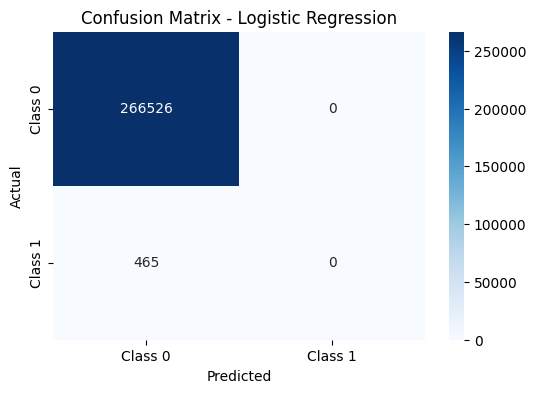

Logistic Regression Evaluation:
Accuracy: 0.9982583682596042
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Memisahkan fitur dan target
X = scaled_data.drop(columns=["Class"])
y = scaled_data["Class"]

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred_logreg = logreg.predict(X)

# Evaluasi Model
accuracy_logreg = accuracy_score(y, y_pred_logreg)
precision_logreg = precision_score(y, y_pred_logreg)
recall_logreg = recall_score(y, y_pred_logreg)
f1_logreg = f1_score(y, y_pred_logreg)

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y, y_pred_logreg)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan hasil evaluasi
print(f"Logistic Regression Evaluation:\nAccuracy: {accuracy_logreg}\nPrecision: {precision_logreg}\nRecall: {recall_logreg}\nF1-Score: {f1_logreg}")


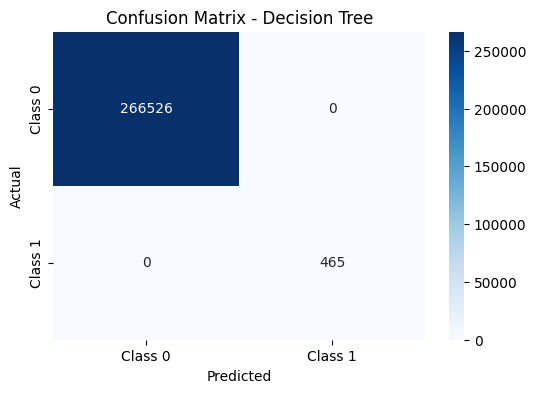

Decision Tree Classifier Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [28]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)
y_pred_dt = dt.predict(X)

# Evaluasi Model
accuracy_dt = accuracy_score(y, y_pred_dt)
precision_dt = precision_score(y, y_pred_dt)
recall_dt = recall_score(y, y_pred_dt)
f1_dt = f1_score(y, y_pred_dt)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y, y_pred_dt)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan hasil evaluasi
print(f"Decision Tree Classifier Evaluation:\nAccuracy: {accuracy_dt}\nPrecision: {precision_dt}\nRecall: {recall_dt}\nF1-Score: {f1_dt}")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


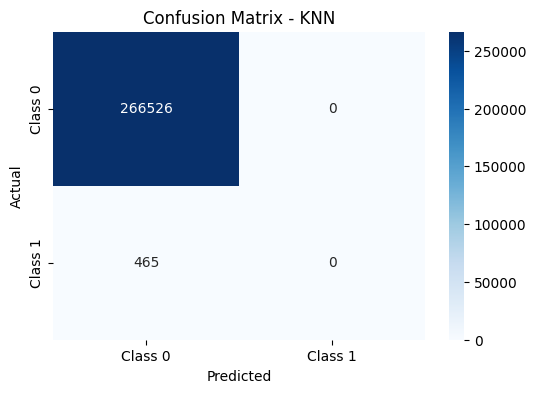

K-Nearest Neighbors Evaluation:
Accuracy: 0.9982583682596042
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


In [29]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred_knn = knn.predict(X)

# Evaluasi Model
accuracy_knn = accuracy_score(y, y_pred_knn)
precision_knn = precision_score(y, y_pred_knn)
recall_knn = recall_score(y, y_pred_knn)
f1_knn = f1_score(y, y_pred_knn)

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y, y_pred_knn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan hasil evaluasi
print(f"K-Nearest Neighbors Evaluation:\nAccuracy: {accuracy_knn}\nPrecision: {precision_knn}\nRecall: {recall_knn}\nF1-Score: {f1_knn}")


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging Classifier
# The 'base_estimator' argument has been replaced with 'estimator'
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X, y)
y_pred_bagging = bagging.predict(X)

# Evaluasi Model
accuracy_bagging = accuracy_score(y, y_pred_bagging)
precision_bagging = precision_score(y, y_pred_bagging)
recall_bagging = recall_score(y, y_pred_bagging)
f1_bagging = f1_score(y, y_pred_bagging)

# Confusion Matrix
conf_matrix_bagging = confusion_matrix(y, y_pred_bagging)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Bagging Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan hasil evaluasi
print(f"Bagging Classifier Evaluation:\nAccuracy: {accuracy_bagging}\nPrecision: {precision_bagging}\nRecall: {recall_bagging}\nF1-Score: {f1_bagging}")


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Boosting Classifier (AdaBoost)
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X, y)
y_pred_adaboost = adaboost.predict(X)

# Evaluasi Model
accuracy_adaboost = accuracy_score(y, y_pred_adaboost)
precision_adaboost = precision_score(y, y_pred_adaboost)
recall_adaboost = recall_score(y, y_pred_adaboost)
f1_adaboost = f1_score(y, y_pred_adaboost)

# Confusion Matrix
conf_matrix_adaboost = confusion_matrix(y, y_pred_adaboost)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan hasil evaluasi
print(f"AdaBoost Classifier Evaluation:\nAccuracy: {accuracy_adaboost}\nPrecision: {precision_adaboost}\nRecall: {recall_adaboost}\nF1-Score: {f1_adaboost}")


In [ ]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X, y)
y_pred_svm = svm.predict(X)

# Evaluasi Model
accuracy_svm = accuracy_score(y, y_pred_svm)
precision_svm = precision_score(y, y_pred_svm)
recall_svm = recall_score(y, y_pred_svm)
f1_svm = f1_score(y, y_pred_svm)

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y, y_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan hasil evaluasi
print(f"SVM Evaluation:\nAccuracy: {accuracy_svm}\nPrecision: {precision_svm}\nRecall: {recall_svm}\nF1-Score: {f1_svm}")


# Analisa

### 1. **AUC-ROC Tinggi tetapi Presisi Rendah**

**Penyebab Ketidaksesuaian:**

* **AUC-ROC** mengukur kemampuan model untuk membedakan antara kelas positif dan negatif tanpa mempertimbangkan ambang batas klasifikasi. Oleh karena itu, AUC-ROC yang tinggi menunjukkan bahwa model dapat membedakan dengan baik antara kelas-kelas tersebut.
* **Presisi** mengukur proporsi prediksi positif yang benar. Jika presisi rendah meskipun AUC-ROC tinggi, ini bisa berarti model sangat sering memprediksi kelas positif, tetapi banyak dari prediksi tersebut adalah **false positives**.

**Strategi Tuning Hyperparameter untuk Meningkatkan Presisi:**

* **Menyesuaikan threshold klasifikasi**: Mengubah ambang batas (threshold) yang digunakan untuk memutuskan apakah sebuah prediksi masuk dalam kelas positif atau negatif dapat membantu meningkatkan presisi. Misalnya, mengurangi kemungkinan memprediksi kelas positif akan mengurangi jumlah false positives, meskipun mungkin sedikit menurunkan AUC-ROC.
* **Menggunakan regularisasi**: Regularisasi dapat membantu model untuk tidak overfit dan membuat keputusan yang lebih konservatif, meningkatkan presisi.

**Peran Recall dalam Konteks Ini:**

* **Recall** mengukur proporsi kelas positif yang berhasil diprediksi dengan benar. Dalam konteks ini, **false negatives** bisa berbahaya, terutama jika target dari model adalah mendeteksi kejadian penting seperti penipuan (fraud detection) atau penyakit.
* **Biaya False Negative**: False negative dapat berbahaya karena menyembunyikan contoh positif yang seharusnya terdeteksi. Misalnya, dalam kasus fraud detection, tidak mendeteksi transaksi penipuan (false negative) dapat mengarah pada kerugian finansial.

### 2. **Fitur Kategorikal dengan 1000 Nilai Unik (High Cardinality)**

**Dampak Terhadap Estimasi Koefisien dan Presisi:**

* Fitur dengan **high cardinality** mengarah pada model yang lebih kompleks dengan lebih banyak koefisien untuk setiap kategori, yang bisa menyebabkan model menjadi lebih sulit untuk dipelajari dan berisiko overfit.
* Hal ini juga bisa mempengaruhi stabilitas **presisi**, karena estimasi koefisien yang buruk dapat mengarah pada prediksi yang tidak stabil dan tidak dapat diandalkan.

**Target Encoding dan Risiko Data Leakage:**

* **Target Encoding** mengonversi kategori menjadi rata-rata target untuk masing-masing kategori, yang dapat menyebabkan **data leakage** jika target encoding diterapkan sebelum pembagian data train-test. Ini karena informasi dari target di data test bisa bocor ke dalam model selama pelatihan, mengarah pada **optimisme yang tidak realistis** dalam hasil evaluasi model.

**Alternatif yang Lebih Aman:**

* **One-Hot Encoding** adalah alternatif yang lebih aman, meskipun ini bisa menyebabkan masalah dimensi tinggi dengan high cardinality.
* **Frequency Encoding** atau **Hashing** adalah teknik lain yang bisa digunakan untuk mengurangi dimensi tanpa menyebabkan data leakage.

**Menjaga AUC-ROC**:

* Menggunakan encoding yang lebih sederhana seperti **One-Hot Encoding** atau teknik lain yang tidak berisiko leak bisa menjaga stabilitas model dan performa AUC-ROC.

### 3. **Dampak Normalisasi Min-Max pada SVM dan Gradient Boosting**

**Impact on SVM Linear:**

* **Normalisasi Min-Max** mengubah skala fitur menjadi rentang \[0, 1], yang memengaruhi **decision boundary** pada SVM. Dengan normalisasi, SVM dapat menemukan **margin lebih optimal** antara kelas, yang meningkatkan **presisi** tetapi mungkin menurunkan **recall**, terutama pada kelas minoritas.
* **Margin Kelas Minoritas**: SVM mengoptimalkan margin antara kelas, yang bisa lebih menantang untuk kelas minoritas setelah normalisasi, menyebabkan penurunan recall pada kelas tersebut.

**Scaling di Gradient Boosting**:

* **Gradient Boosting** adalah model berbasis pohon keputusan yang tidak terpengaruh oleh skala fitur karena ia tidak bergantung pada jarak antar data seperti SVM.
* Scaling yang diterapkan pada fitur tidak berpengaruh banyak pada **Gradient Boosting**, namun bisa memperburuk **overfitting** karena pohon keputusan bisa lebih mengubah bentuk untuk mencoba mencocokkan skala data.

### 4. **Feature Interaction dan Peningkatan AUC-ROC**

**Mekanisme Matematis di Balik Peningkatan AUC-ROC**:

* Menggabungkan dua fitur dengan **perkalian** menciptakan **interaksi** antara fitur-fitur tersebut, yang bisa membentuk boundary non-linear. Ini memungkinkan model untuk menangkap hubungan yang tidak terdeteksi dengan hanya menggunakan fitur-fitur secara terpisah, meningkatkan **AUC-ROC**.

**Chi-Square Test dan Interaksi Non-Linear**:

* **Uji Chi-Square** hanya mendeteksi hubungan **linier** antara fitur dan target. Interaksi non-linear tidak dapat dideteksi dengan cara ini karena chi-square menguji asosiasi berdasarkan frekuensi kategori yang terpisah.

**Alternatif dengan Domain Knowledge**:

* Penggunaan **domain knowledge** untuk merancang **feature engineering** atau memilih kombinasi fitur yang relevan bisa meningkatkan performa model. Misalnya, menciptakan fitur baru yang secara langsung mencerminkan pemahaman tentang hubungan antar variabel.

### 5. **Oversampling Sebelum Pembagian Train-Test dan Temporal Split**

**Mengapa Oversampling Sebelum Pembagian Dapat Mengakibatkan Data Leakage**:

* **Oversampling** (misalnya menggunakan SMOTE) sebelum membagi data train-test dapat menyebabkan **data leakage** karena data dari **test set** digunakan untuk menghasilkan sampel yang ada di **train set**. Hal ini menyebabkan **evaluasi yang terlalu optimis** pada **AUC-ROC** dan metrik lainnya.

**Temporal Split Lebih Aman untuk Fraud Detection**:

* Dalam konteks **fraud detection**, **temporal split** lebih aman karena data **train** hanya mencakup informasi yang tersedia pada waktu sebelumnya, sementara data **test** hanya mencakup informasi di masa depan. Ini lebih realistis karena model akan dihadapkan pada data yang belum terlihat sebelumnya.

**Masalah dengan Stratified Sampling**:

* **Stratified sampling** memastikan proporsi kelas terjaga, tetapi jika digunakan bersama dengan oversampling sebelum split, ini bisa memperburuk **data leakage**.

**Desain Preprocessing yang Benar**:

* Proses yang benar untuk menghindari data leakage adalah dengan **memisahkan data** terlebih dahulu ke dalam train-test, kemudian melakukan **oversampling** pada train set, untuk memastikan evaluasi model yang realistis dan mencegah optimisme berlebihan.

---

